torch.utils.data.Dataset: stores samples and their corresponding labels.
torch.utils.data.DataLoader: wraps an iterable around the Dataset

Image datasets: https://pytorch.org/vision/stable/datasets.html \
Text datasets: https://pytorch.org/text/stable/datasets.html \
Audio datasets: https://pytorch.org/audio/stable/datasets.html

# Dataset and Load Data

In [2]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [3]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26421880/26421880 [00:01<00:00, 18538628.01it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 129372.93it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:08<00:00, 519827.59it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 10486778.53it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



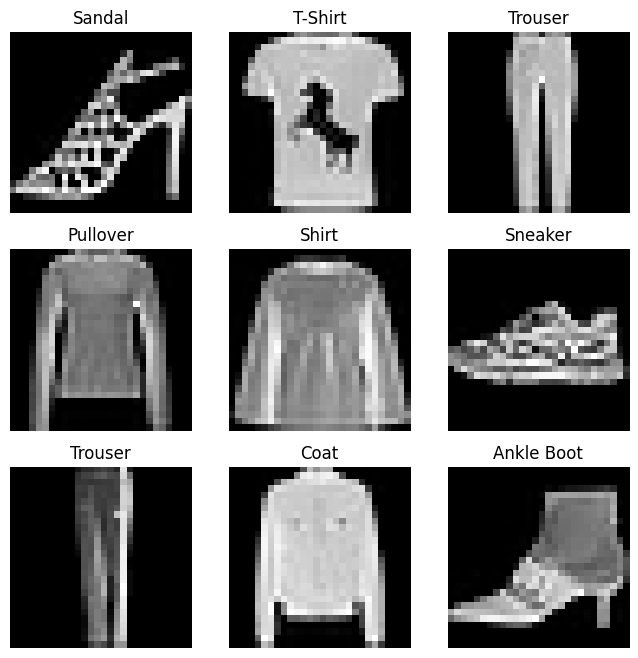

In [9]:
# iterating and visualizing the dataset
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
fig = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols*rows+1):
    # get a random sample
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    fig.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

# DataLoader For Batch Training

In [26]:
# DataLoader prepares for batch training
from torch.utils.data import DataLoader

In [27]:
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


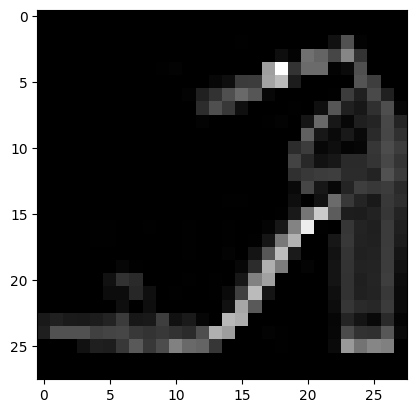

Label: 5


In [28]:
# iteration: each iteration returns a batch of train_features and train_labels
# display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

# Transforms

transform: modify the features\
target_transform: modify the labels

The FashionMNIST features are in PIL Image format, and the labels are integers. For training, need the features as normalized tensors, and the labels as one-hot encoded tensors. To make these transformations, use ToTensor and Lambda.

In [32]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

"""
    ToTesor(): converts a PIL image or NumPy ndarray into a 
    FloatTensor and scales the image's pixel intensity values 
    in the range [0., 1.]

    Lambda Transforms: apply any user-defined lambda function
"""


ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    # turn the integer to a one-hot encoded tensor
    # the position corresponding to y is set to 1, all other positions are 0
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)